# Tarea 2 (fecha de entrega 21 de Octubre, 23:59:59 por webcursos)
### Se permiten grupos de hasta 4 personas
La NASA mantiene la información de varios cometas y después de un exhaustivo análisis ha determinado cuál de ellos es peligroso en caso de que choque a la tierra (variable Danger). Específicamente, han analizado en forma manual una muestra de 100.000 asteroides. Los datos consisten en 27 variables, con distinta información como por ejemplo nombre del asteroide, su periodo orbital, su periodo de rotación, etc. Todos los datos existentes, se encuentran en un puro archivo llamado tarea2Data.csv. Mientras que las descripciones de cada una de las variables se encuentran en el archivo tarea2Informacion.txt

Desafortunadamente, la NASA todavía no ha evaluado 37.681 asteroides y no tienen tiempo para realizarlo. Por lo mismo, le piden que aplique modelos de Machine learning para obtener una evaluación de estos asteroides.

1. Lea los datos y borre las variables/asteroides que estime necesario. En caso que crea que la base de datos todavía es demasiado grande para aplicar los modelos, usted puede tomar una muestra de la misma (1 punto).
2. Aplique al menos 2 modelos de los vistos en clases (si quiere puede aplicar modelos de clustering y usarlos como clasificación) y realice una correcta comparación entre ellos. En este punto se evaluará la correcta selección de parámetros, como la correcta comparación entre los modelos seleccionados (4 puntos).
3. Seleccione uno de los modelos del punto anterior y evalue los 37.681 asteroides que la NASA no ha evaluado. Se deberá generar un archivo csv con 37.681 filas, cada fila podrá ser False o True, donde False representa que el asteroide no es peligroso para la tierra (1 punto). 

El punto de evaluación final será una competencia entre todas las tareas basados en los f1-score (pos_label="False") obtenido por cada grupo. El puntaje final será una regresión lineal entre el peor y mejor puntaje.

# 1. Cargamos los datos, los estudiamos y procesamos.

Instalamos las librerias necesarias para comenzar el analisis exploratorio de los datos.

In [1]:
!pip install missingpy
!pip install sweetviz
import sweetviz as sv
import missingno as msno 
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from missingpy import MissForest
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 12.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from plotnine import *

     |████████████████████████████████| 49 kB 2.7 MB/s 
     |████████████████████████████████| 15.1 MB 190 kB/s 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Cargamos los datos necesarios para codificar.
Identificamos las columnas de la base de datos.
Imprimimos una tabla resumen de los datos.
Luego visualizamos la información general de los datos para chequear algunas cosas como: tipos de datos, datos faltantes, cantidad de registros, columnas y filas totales.

In [188]:
datos = pd.read_csv("tarea2Data.csv") 
print(datos.columns)
print(datos.head())
print(datos.info())
# Cantidad de registros
print("cantidad de registros", datos.count())

Index(['full_name', 'a', 'e', 'G', 'i', 'om', 'w', 'q', 'ad', 'per_y',
       'data_arc', 'condition_code', 'n_obs_used', 'H', 'extent', 'albedo',
       'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'neo', 'pha',
       'moid', 'Danger'],
      dtype='object')
      full_name         a         e   G  ...  neo  pha     moid  Danger
0    (1162 T-1)  3.069911  0.096918 NaN  ...    N    N  1.78504    True
1  (2000 WV173)  3.126769  0.101765 NaN  ...    N    N  1.85923    True
2   (2010 PE41)  3.240195  0.114902 NaN  ...    N    N  1.92025    True
3  (1999 TF222)  3.118650  0.062830 NaN  ...    N    N  1.94124    True
4   (2003 WG74)  3.032740  0.104018 NaN  ...    N    N  1.73110    True

[5 rows x 27 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   full_name       100000 non-null  object 
 1   a               10000

Verificamos la cantidad de datos nulos que posee cada columna de la BD.
Posteriormente verificamos la cantidad de registros unicos que poseen los campos para tener una mayor aproximación y entendimiento de los ellos.

In [189]:
print("Valores nulos totales:")
print(datos.isnull().sum())
print('______________ \n')
print("Porcentaje de valores nulos totales:")
print(datos.isnull().sum() / len(datos) * 100)

Valores nulos totales:
full_name             0
a                     0
e                     0
G                 99917
i                     0
om                    0
w                     0
q                     0
ad                    0
per_y                 0
data_arc             98
condition_code        0
n_obs_used            0
H                   550
extent            99989
albedo              894
rot_per           91898
GM                99989
BV                99291
UB                99318
IR                99999
spec_B            99011
spec_T            99310
neo                   0
pha                   0
moid                  0
Danger                0
dtype: int64
______________ 

Porcentaje de valores nulos totales:
full_name          0.000
a                  0.000
e                  0.000
G                 99.917
i                  0.000
om                 0.000
w                  0.000
q                  0.000
ad                 0.000
per_y              0.000
data_arc    

Generamos una matriz con todos los datos, para visualizar que tan poblado se encuentra cada una de las distintas variables.

AxesSubplot(0.125,0.125;0.698618x0.755)
Podemos observar que existen variables que la mayoria de sus datos son nulos, tales como: 
 G, extent, rot_per, GM, BV, UB, IR, spec_B, spec_T


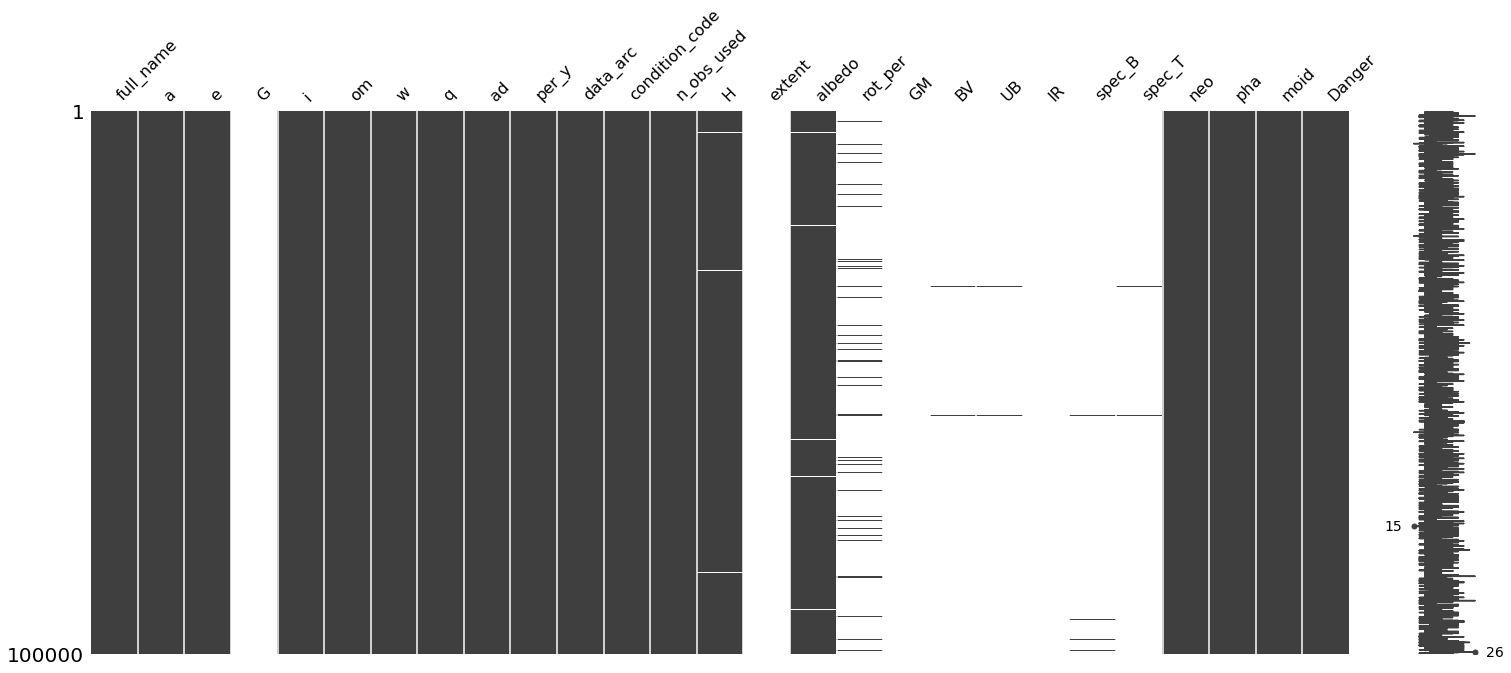

In [190]:
# para detectar una matriz con los datos nulos
print(msno.matrix(datos))
print('Podemos observar que existen variables que la mayoria de sus datos son nulos, tales como: \n G, extent, rot_per, GM, BV, UB, IR, spec_B, spec_T')

Eliminamos las siguientes variables de nuestro analisis: 
- full_name: Dado que es el nombre del asteroide y no nos entrega información relevante de cara al analisis.
- G, extent, rot_per, GM, BV, UB, IR, spec_B, spec_T: Todas ellas las elimanaremos de nuestro dataset dado el alto número de datos nulos que poseen (sobre el 99% de los valores nulos) eso dificulta poder realizar cualquier tipo de tratamiento a las mismas.

In [191]:
datos = datos.drop(['full_name','G','extent','rot_per','GM','BV','UB','IR','spec_B','spec_T'], axis=1)
print(datos.columns)

Index(['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc',
       'condition_code', 'n_obs_used', 'H', 'albedo', 'neo', 'pha', 'moid',
       'Danger'],
      dtype='object')


Volvemos a visualizar los datos de las variables que mantuvimos en nuestro dataset, despues de haber realizado la eliminación de variables que poseian un alto número de valores nulos:

AxesSubplot(0.125,0.125;0.698618x0.755)


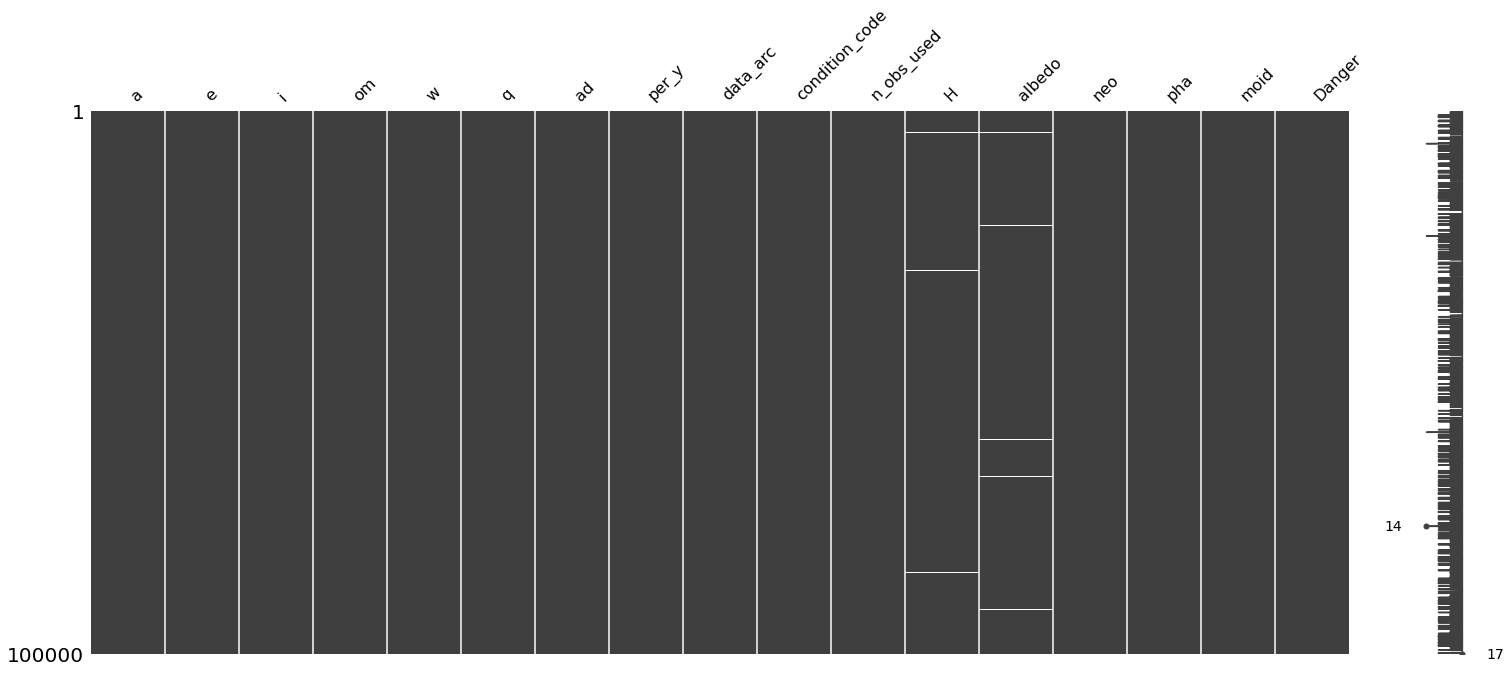

In [192]:
print(msno.matrix(datos))

In [193]:
print('Tomamos la variable objetivo "Danger" y la transformamos en valores 0 para False y 1 para True \n')
condicion1 = [
    (datos['Danger'] == False),
    (datos['Danger'] == True),
    ]
valores1 = [0, 1]
datos['Danger'] = np.select(condicion1, valores1)

print("Danger")
print(datos.Danger.value_counts(normalize=True))
print('\n')
print('Podemos observar que sobre el 90% de los datos que cotiene el dataset tienen un True (1 luego de la modificación) para la variable objetivo Danger')

Tomamos la variable objetivo "Danger" y la transformamos en valores 0 para False y 1 para True 

Danger
1    0.90461
0    0.09539
Name: Danger, dtype: float64


Podemos observar que sobre el 90% de los datos que cotiene el dataset tienen un True (1 luego de la modificación) para la variable objetivo Danger


In [194]:
#separate variables into new data frames
numeric_data = datos.select_dtypes(include=[np.number])
shape_numeric_data=numeric_data.shape[1]

cat_data = datos.select_dtypes(exclude=[np.number])
shape_cat_data=cat_data.shape[1]

print(f"Podemos observar que en la base de datos encontramos {shape_numeric_data} campos numericos y {shape_cat_data} categoricos. \n")
datos.info()

Podemos observar que en la base de datos encontramos 15 campos numericos y 2 categoricos. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               100000 non-null  float64
 1   e               100000 non-null  float64
 2   i               100000 non-null  float64
 3   om              100000 non-null  float64
 4   w               100000 non-null  float64
 5   q               100000 non-null  float64
 6   ad              100000 non-null  float64
 7   per_y           100000 non-null  float64
 8   data_arc        99902 non-null   float64
 9   condition_code  100000 non-null  int64  
 10  n_obs_used      100000 non-null  int64  
 11  H               99450 non-null   float64
 12  albedo          99106 non-null   float64
 13  neo             100000 non-null  object 
 14  pha             100000 non-null  object 
 15  moid       

Queremos conocer si es que existe alguna correlación entre las variables, y para eso utilizaremos la siguiente visualización para ver si podemos identificar alguna de ellas.

Figure(1440x1440)
AxesSubplot(0.125,0.125;0.62x0.755)


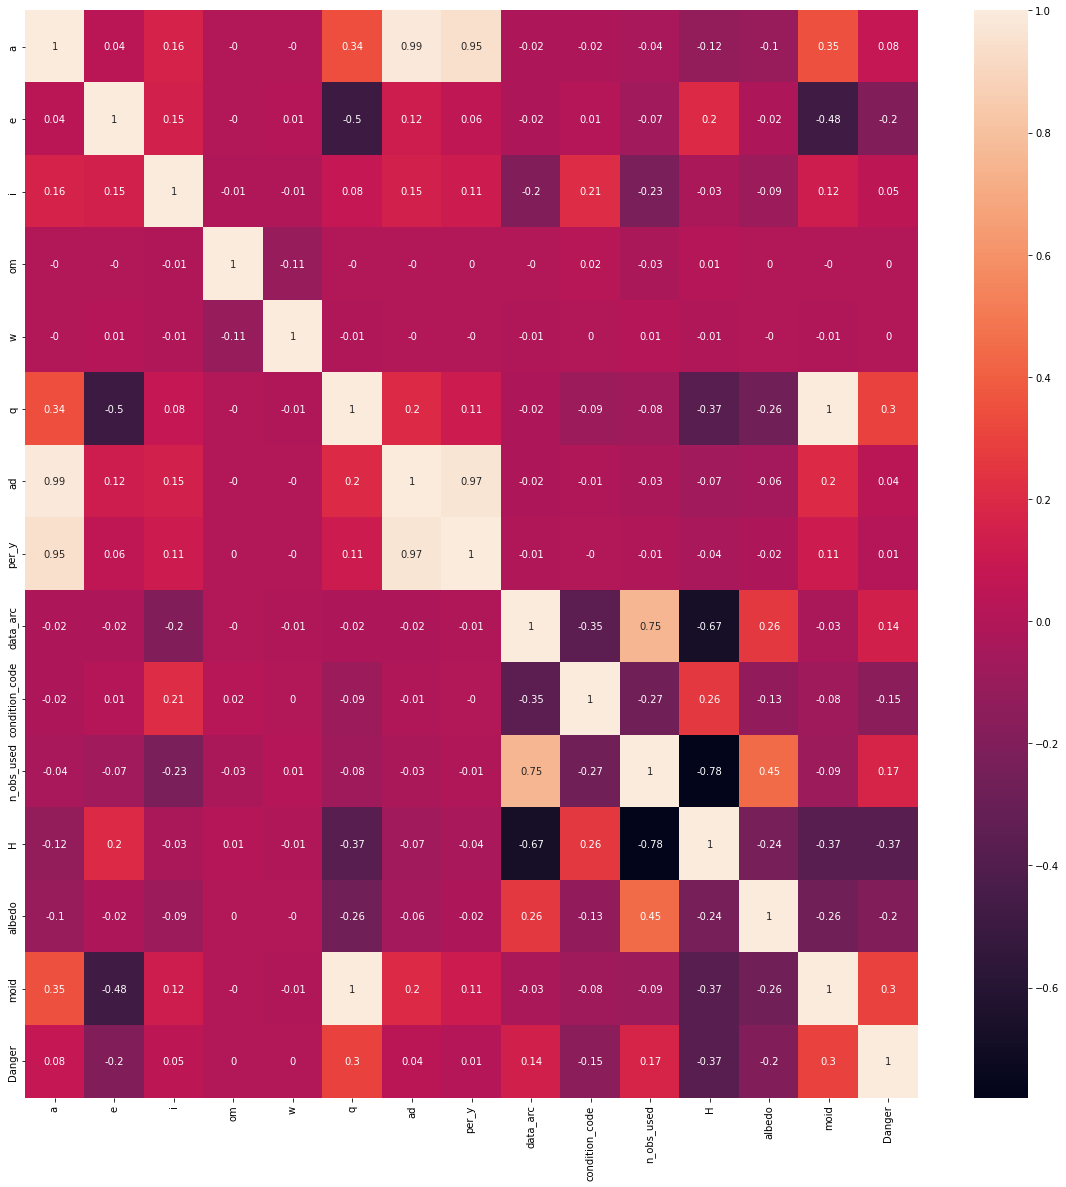

In [195]:
print(plt.figure(figsize=(20,20)))
print(sns.heatmap(data=round(datos.corr(),2), annot=True)) 

Considerando que el dataset contiene una gran cantidad de datos y podemos observar que aún existen datos nulos dentro de las variables que hemos seleccionado, decidimos eliminar directamente lo valores nulos que aun se mantienen 

In [196]:
datos1 = datos.dropna()
datos1.info()
print('\n')
print('Podemos observar que el dataset a quedado sin datos nulos')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98815 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   a               98815 non-null  float64
 1   e               98815 non-null  float64
 2   i               98815 non-null  float64
 3   om              98815 non-null  float64
 4   w               98815 non-null  float64
 5   q               98815 non-null  float64
 6   ad              98815 non-null  float64
 7   per_y           98815 non-null  float64
 8   data_arc        98815 non-null  float64
 9   condition_code  98815 non-null  int64  
 10  n_obs_used      98815 non-null  int64  
 11  H               98815 non-null  float64
 12  albedo          98815 non-null  float64
 13  neo             98815 non-null  object 
 14  pha             98815 non-null  object 
 15  moid            98815 non-null  float64
 16  Danger          98815 non-null  int64  
dtypes: float64(12), int64(3), objec

Por ultimo mostramos un histograma por cada variable numerica e identificamos si poseen algun tipo de sesgo y/o comportamiento dada su naturaleza. 

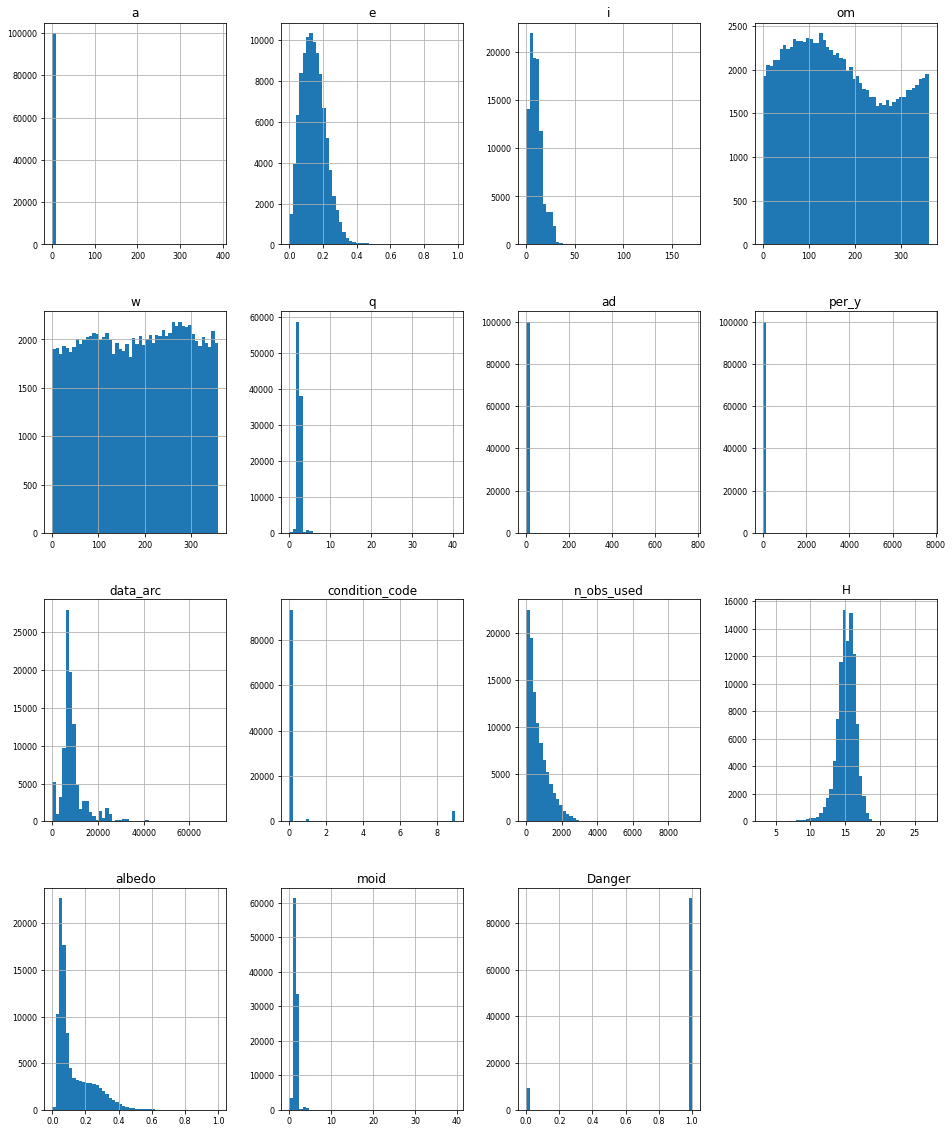

In [197]:
numeric_data.hist(figsize=(16,20),bins=50,xlabelsize=8,ylabelsize=8);

# 2. Aplicamos los Modelos

**Aplicaremos KNN como primer modelo seleccionado**

Preparamos K-fold cross validation para un valor específico de k=1 (KNN) y utilizamos numFolds=10, esto para conocer como se comporta el modelo de forma más básica.


Como utilizaremos KNN este modelo solo acepta datos númericos por este motivo eliminaremos las variables:
- neo: Contiene valores
- pha: Contiene valores
- condition_code: la cual posee valores del 0 al 9, pero que cada una de ellas indica una información que no conocemos.
Además la variable Danger la pasaremos al tipo string para que no tengamos problemas al trabajar con el modelo.

In [198]:
datos2= datos1
#Conviertir var: Danger a type objetc (string)
datos2['Danger'] = datos2.Danger.astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [199]:
datos2 = datos2.drop(['neo','pha','condition_code'],axis=1)
datos2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98815 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   a           98815 non-null  float64
 1   e           98815 non-null  float64
 2   i           98815 non-null  float64
 3   om          98815 non-null  float64
 4   w           98815 non-null  float64
 5   q           98815 non-null  float64
 6   ad          98815 non-null  float64
 7   per_y       98815 non-null  float64
 8   data_arc    98815 non-null  float64
 9   n_obs_used  98815 non-null  int64  
 10  H           98815 non-null  float64
 11  albedo      98815 non-null  float64
 12  moid        98815 non-null  float64
 13  Danger      98815 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 11.3+ MB


In [200]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics as mt

numFolds=10

kf = KFold(n_splits=numFolds, shuffle=True)
temp = kf.split(datos2)

KNN = KNeighborsClassifier(n_neighbors=1, weights='uniform')

allF1Test=np.zeros((numFolds,1))
allF1Train=np.zeros((numFolds,1))
allAcc=np.zeros((numFolds,1))
allRecall=np.zeros((numFolds,1))
allPrecision=np.zeros((numFolds,1))

scaler = StandardScaler()


index=0 
for train_index, test_index in temp:
    scaler = scaler.fit(datos2.iloc[train_index,:13]) 
    numericData = scaler.transform(datos2.iloc[:,:13])
    KNN = KNN.fit(numericData[train_index,:],datos2.iloc[train_index,13])
    prediccion=KNN.predict(numericData[train_index,:])    
    allF1Train[index]=mt.f1_score(datos2.iloc[train_index,13],prediccion,pos_label='1') 
    prediccion=KNN.predict(numericData[test_index,:])
    allF1Test[index]=mt.f1_score(datos2.iloc[test_index,13],prediccion,pos_label='1')
    allRecall[index]=mt.recall_score(datos2.iloc[test_index,13],prediccion,pos_label='1')
    allPrecision[index]=mt.precision_score(datos2.iloc[test_index,13],prediccion,pos_label='1')
    allAcc[index]=mt.accuracy_score(datos2.iloc[test_index,13],prediccion)
    index+=1


print('Calculamos el f1-score, recall, y precision usando la clase "1" como pos label (pos_label="1") y') 
print('mostramos por pantalla los errores de entrenamiento (solo F1-score) y test (F1-score, recall, y precision)')
print("Average F1-score train: ",allF1Train.mean(),"+-",allF1Train.std())
print("Average F1-score test: ",allF1Test.mean(),"+-",allF1Test.std())
print("Average recall test: ",allRecall.mean(),"+-",allRecall.std())
print("Average precision test: ",allPrecision.mean(),"+-",allPrecision.std())
print("Average accuracy test: ",allAcc.mean(),"+-",allAcc.std())

Calculamos el f1-score, recall, y precision usando la clase "1" como pos label (pos_label="1") y
mostramos por pantalla los errores de entrenamiento (solo F1-score) y test (F1-score, recall, y precision)
Average F1-score train:  1.0 +- 0.0
Average F1-score test:  0.9720224402434525 +- 0.000723512016461456
Average recall test:  0.9744030227285145 +- 0.0009315735075806483
Average precision test:  0.9696572530676766 +- 0.0019650934544807146
Average accuracy test:  0.9491777614040189 +- 0.0012619813361662861


Generalizamos el valor de k para KNN en múltiples valores y probamos desde k=1 hasta k=7.

Posteriormente comenzamos la búsqueda del mejor k.

In [201]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler

maxK=7

allResults=pd.DataFrame(np.zeros((maxK,11)),columns=["meanTrain",'stdTrain',"meanTest",'stdTest','meanRecallTest',"stdRecallTest",'meanPrecisionTest',"stdPrecisionTest",'meanAccTest',"stdAccTest","ejeX"])
allResults.iloc[:,allResults.shape[1]-1]=list(range(1,maxK+1))

scaler = StandardScaler()

numFolds=10
kf = KFold(n_splits=numFolds,shuffle=True)


for k in range(1,maxK+1):
    KNN = KNeighborsClassifier(n_neighbors=k, weights='uniform')

    allF1Test=np.zeros((numFolds,1))
    allF1Train=np.zeros((numFolds,1))
    allPrecision=np.zeros((numFolds,1))
    allRecall=np.zeros((numFolds,1))
    allAcc=np.zeros((numFolds,1))
    index=0
    for train_index, test_index in kf.split(datos2):        
        scaler = scaler.fit(datos2.iloc[train_index,:13])
        numericData = scaler.transform(datos2.iloc[:,:13])
        KNN = KNN.fit(numericData[train_index,:],datos2.iloc[train_index,13])
        prediccion=KNN.predict(numericData[train_index,:])
        allF1Train[index]=mt.f1_score(datos2.iloc[train_index,13],prediccion, pos_label='1')
        prediccion=KNN.predict(numericData[test_index,:])
        allF1Test[index]=mt.f1_score(datos2.iloc[test_index,13],prediccion,pos_label='1')
        allRecall[index]=mt.recall_score(datos2.iloc[test_index,13],prediccion,pos_label='1')
        allPrecision[index]=mt.precision_score(datos2.iloc[test_index,13],prediccion,pos_label='1')
        allAcc[index]=mt.accuracy_score(datos2.iloc[test_index,13],prediccion)
        index+=1

    allResults.iloc[k-1,0]=allF1Train.mean()
    allResults.iloc[k-1,1]=allF1Train.std()
    allResults.iloc[k-1,2]=allF1Test.mean()
    allResults.iloc[k-1,3]=allF1Test.std()
    allResults.iloc[k-1,4]=allRecall.mean()
    allResults.iloc[k-1,5]=allRecall.std()    
    allResults.iloc[k-1,6]=allPrecision.mean()
    allResults.iloc[k-1,7]=allPrecision.std()    


In [202]:
print('Visualizamos los valores que nos entrego el proceso anterior para los parametros definidos: \n')
allResults

Visualizamos los valores que nos entrego el proceso anterior para los parametros definidos: 



,meanTrain,stdTrain,meanTest,stdTest,meanRecallTest,stdRecallTest,meanPrecisionTest,stdPrecisionTest,meanAccTest,stdAccTest,ejeX
0,1.000000,0.000000,0.972133,0.000900,0.974089,0.001220,0.970189,0.001721,0.0,0.0,1
1,0.986922,0.000128,0.968766,0.001178,0.955270,0.002077,0.982653,0.001722,0.0,0.0,2
2,0.987299,0.000136,0.976147,0.001071,0.982029,0.001324,0.970337,0.001571,0.0,0.0,3
3,0.985310,0.000117,0.975791,0.000874,0.973342,0.002001,0.978257,0.001505,0.0,0.0,4
4,0.984798,0.000131,0.977830,0.000719,0.985034,0.001257,0.970733,0.001667,0.0,0.0,5
5,0.984393,0.000116,0.977171,0.000757,0.978681,0.001209,0.975669,0.001450,0.0,0.0,6
6,0.983549,0.000143,0.978226,0.000888,0.986755,0.001157,0.969846,0.001442,0.0,0.0,7


Graficamos los resultados.

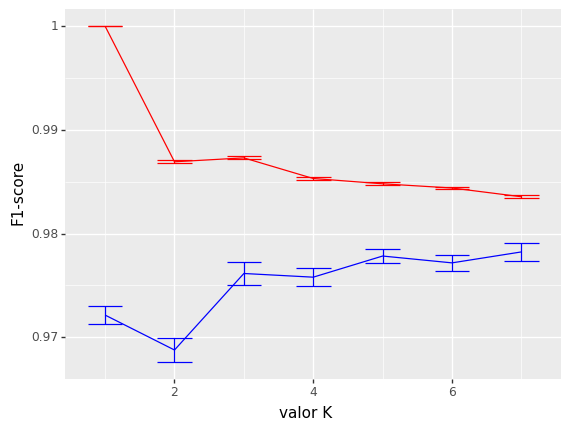

<ggplot: (8788655166197)>


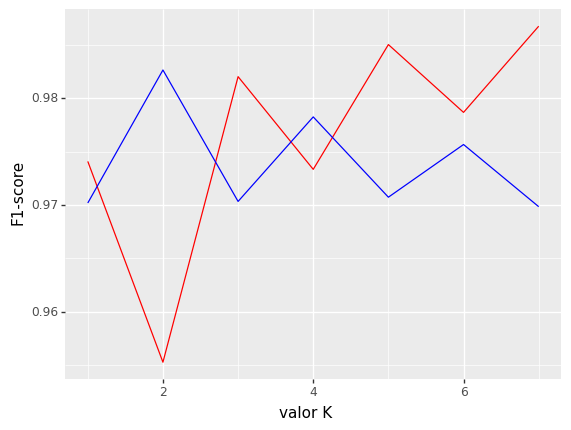

<ggplot: (8788656001957)>


In [203]:
print(ggplot(allResults)+aes(x="ejeX")+
 geom_line(aes(y="meanTrain"),color="red")+
 geom_errorbar(aes(ymin="meanTrain-stdTrain",ymax="meanTrain+stdTrain"),color="red")+
 geom_line(aes(y="meanTest"),color="blue")+
 geom_errorbar(aes(ymin="meanTest-stdTest",ymax="meanTest+stdTest"),color="blue")+
 labs(x="valor K",y="F1-score")
)
print(ggplot(allResults)+aes(x="ejeX")+
 geom_line(aes(y="meanRecallTest"),color="red")+
 geom_line(aes(y="meanPrecisionTest"),color="blue")+
 labs(x="valor K",y="F1-score")
)

Utilizamos el valor de k que consideramos mejor seleccionando (k=3).

Calculamos los tpr, fpr y limites (thresholds).

Graficamos la Curva ROC.

Calculamos los valores de g-means para los valores de fpr y tpr.

Comparamos los resultados.

Luego de realizada la evaluación para k de 1 a 7 y un Kfold = 10. Podemos observar que el que presenta el equilibrio aceptable entre el promedio de entrenamiento y validación (primer gráfico) es K = 3, además en validación tiene un desviación estandar muy baja.
Por otro lado al observar el segundo gráfico de Recall (curva roja) y Precission (curva azul). Dada la naturaleza del problema que es predecir si un asteroide representa una amenaza para la tierra, creemos que es más importante predecir que lo es, cuando en la práctica no lo sea (por el peligro que representa)(FP - Precission), sin embargo, tambien creeemos que es relevante intentar ser lo más asertivos posibles respecto a que tanto predecimos una no amenaza siendo que si lo es (FN - Recall), dado que existe una gran cantidad de asteroides en nuestro universo, lo que haría imposible poder investigar todo dado que los recursos son limitados. Dicho esto creemos que donde tenemos un equilibrio aceptable es en K=3 y K=5. Para esta evaluación escogeremos K=3 dado que la curva precission si bien no es la mejor, es bastante aceptable y la curva recall es igual de aceptable que la anterior, ambas en el punto donde vemos que el promedio de entrenamiento y validación se equilibran. 


**K = 3**

Datos: 
- 70% Entrenamiento
- 30% Validación

        FPR       TPR   Limites
0  0.000000  0.000000  2.000000
1  0.107130  0.941373  1.000000
2  0.283388  0.983223  0.666667
3  0.541079  0.996652  0.333333
4  1.000000  1.000000  0.000000


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


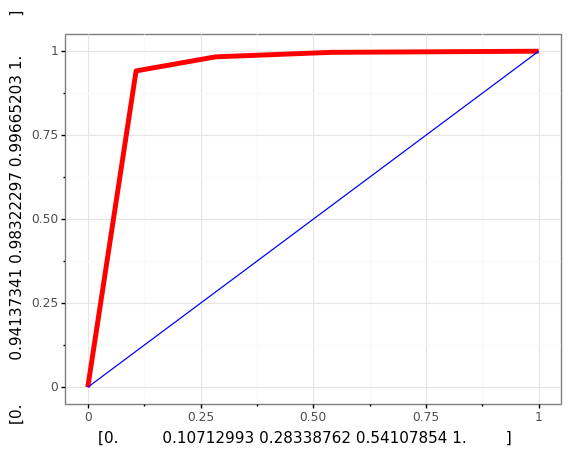

<ggplot: (8788655048221)>
Threshold=1.000000, Best Threshold=1.000000, G-Mean=0.917
Valores originales: 
F1-test:  0.9771887015675835
Recall:  0.9832229744810654
Precision:  0.9712280443889175
Accuracy:  0.9583740934390285

Valores nuevo Threshold: 
F1-test:  0.964331986891243
Recall:  0.9413734097165389
Precision:  0.9884384032497461
Accuracy:  0.9368527576319784


In [208]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

KNN= KNeighborsClassifier(n_neighbors=3, weights='uniform')

X_train, X_test, y_train, y_test = train_test_split(datos2.iloc[:,:13], datos2.iloc[:,13], test_size=0.30, random_state=0)

scaler=StandardScaler()
scaler=scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
KNN=KNN.fit(X_train,y_train)
prediccion=KNN.predict_proba(X_test)
prediccionFija=KNN.predict(X_test)


from sklearn import metrics as mt
fpr, tpr, thresholds = mt.roc_curve(y_test=='1',prediccion[:,1])

tempDF=pd.DataFrame(zip(fpr,tpr,thresholds),columns=['FPR','TPR','Limites'])
print(tempDF)


print(ggplot(tempDF)+ aes(x=fpr, y=tpr)+geom_line(color='red',size=2)+
      annotate('segment',x=0,y=0,xend=1,yend=1,color='blue')+
      theme_bw()
)

mt.auc(fpr,tpr)

gmeans = np.sqrt(tpr * (1-fpr))
ix= np.argmax(gmeans)
print('Threshold=%f, Best Threshold=%f, G-Mean=%.3f' % (ix, thresholds[ix], gmeans[ix]))
indexThreshold = ix

print("Valores originales: ")
print("F1-test: ",mt.f1_score(y_test=="1",prediccion[:,1]>=0.5,pos_label=True))
print("Recall: ",mt.recall_score(y_test=="1",prediccion[:,1]>=0.5,pos_label=True))
print("Precision: ",mt.precision_score(y_test=="1",prediccion[:,1]>=0.5,pos_label=True))
print("Accuracy: ",mt.accuracy_score(y_test=="1",prediccion[:,1]>=0.5))

print("\nValores nuevo Threshold: ")
print("F1-test: ",mt.f1_score(y_test=="1",prediccion[:,1]>=thresholds[indexThreshold],pos_label=True))
print("Recall: ",mt.recall_score(y_test=="1",prediccion[:,1]>=thresholds[indexThreshold],pos_label=True))
print("Precision: ",mt.precision_score(y_test=="1",prediccion[:,1]>=thresholds[indexThreshold],pos_label=True))
print("Accuracy: ",mt.accuracy_score(y_test=="1",prediccion[:,1]>=thresholds[indexThreshold]))

Como sabemos el mejor Threshold es aquel que se encuentra mas cercano al punto numero uno del eje "y" asociado al plano cartesiano de la curva AUC. En relación a esto podemos verificar que el indice G-Mean que en la practica multiplica la raíz cuadrada de los TP contra 1- FP rate, en otras palabras busca que ambos valores sean altos (True Positive y False Positive), indica que el mejor Threshold se sitúa en el punto 0,931. Con ello podemos ver que nuestros valores tanto de Accuracy, Recall y F1-test asociados a los nuevos valores de Threshold y en contraste de la predicción fija disminuyeron, sin embargo el presicion aumentó lo cual a pesar de que el F1-test haya disminuido, es positivo dado que entendiendo nuestro problema y como comentamos anteriormente en el analisis nos interesa que esta curva aumente.

**Aplicaremos NB como segundo modelo**

Utilizaremos:
- GaussianNB
- BernoulliNB
- MultinomialNB

Para evaluar el desempeño de este modelo utilizaremos los datos de la forma que vienen y posteriormente evaluaremos con los datos balanceados.

Evaluaremos para datos estandarizados:

In [205]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn import metrics as mt
from matplotlib import pyplot
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

numFolds=10

kf = KFold(n_splits=numFolds, shuffle=True, random_state=0)
temp = kf.split(datos2)

GNB = GaussianNB()

allF1Test=np.zeros((numFolds,1))
allF1Train=np.zeros((numFolds,1))
allAcc=np.zeros((numFolds,1))
allRecall=np.zeros((numFolds,1))
allPrecision=np.zeros((numFolds,1))

scaler = StandardScaler()


index=0 
for train_index, test_index in temp:
    scaler = scaler.fit(datos2.iloc[train_index,:13]) 
    numericData = scaler.transform(datos2.iloc[:,:13])
    GNB = GNB.fit(numericData[train_index,:],datos2.iloc[train_index,13])
    prediccion=GNB.predict(numericData[train_index,:])    
    allF1Train[index]=mt.f1_score(datos2.iloc[train_index,13],prediccion,pos_label='1') 
    prediccion=GNB.predict(numericData[test_index,:])
    allF1Test[index]=mt.f1_score(datos2.iloc[test_index,13],prediccion,pos_label='1')
    allRecall[index]=mt.recall_score(datos2.iloc[test_index,13],prediccion,pos_label='1')
    allPrecision[index]=mt.precision_score(datos2.iloc[test_index,13],prediccion,pos_label='1')
    allAcc[index]=mt.accuracy_score(datos2.iloc[test_index,13],prediccion)
    index+=1

print('Valores para datos no balanceados GaussianNB:')
print("Average F1-score train: ",allF1Train.mean(),"+-",allF1Train.std())
print("Average F1-score test: ",allF1Test.mean(),"+-",allF1Test.std())
print("Average recall test: ",allRecall.mean(),"+-",allRecall.std())
print("Average precision test: ",allPrecision.mean(),"+-",allPrecision.std())
print("Average accuracy test: ",allAcc.mean(),"+-",allAcc.std())

Valores para datos no balanceados GaussianNB:
Average F1-score train:  0.7603257493034066 +- 0.010706645422147965
Average F1-score test:  0.7603064725857516 +- 0.009460454872236176
Average recall test:  0.6153621691920337 +- 0.012765861550351476
Average precision test:  0.994849486667355 +- 0.0011749244550769066
Average accuracy test:  0.6485959040900826 +- 0.011124550116965351


In [209]:
numFolds=10

kf = KFold(n_splits=numFolds, shuffle=True, random_state=0)
temp = kf.split(datos2)

BNB = BernoulliNB()

allF1Test=np.zeros((numFolds,1))
allF1Train=np.zeros((numFolds,1))
allAcc=np.zeros((numFolds,1))
allRecall=np.zeros((numFolds,1))
allPrecision=np.zeros((numFolds,1))

scaler = StandardScaler()


index=0 
for train_index, test_index in temp:
    scaler = scaler.fit(datos2.iloc[train_index,:13]) 
    numericData = scaler.transform(datos2.iloc[:,:13])
    BNB = BNB.fit(datos2.iloc[train_index,:13],datos2.iloc[train_index,13])
    prediccion=BNB.predict(datos2.iloc[train_index,:13])    
    allF1Train[index]=mt.f1_score(datos2.iloc[train_index,13],prediccion,pos_label='1') 
    prediccion=BNB.predict(datos2.iloc[test_index,:13])
    allF1Test[index]=mt.f1_score(datos2.iloc[test_index,13],prediccion,pos_label='1')
    allRecall[index]=mt.recall_score(datos2.iloc[test_index,13],prediccion,pos_label='1')
    allPrecision[index]=mt.precision_score(datos2.iloc[test_index,13],prediccion,pos_label='1')
    allAcc[index]=mt.accuracy_score(datos2.iloc[test_index,13],prediccion)
    index+=1

print('Valores para datos no balanceados BernoulliNB:')
print("Average F1-score train: ",allF1Train.mean(),"+-",allF1Train.std())
print("Average F1-score test: ",allF1Test.mean(),"+-",allF1Test.std())
print("Average recall test: ",allRecall.mean(),"+-",allRecall.std())
print("Average precision test: ",allPrecision.mean(),"+-",allPrecision.std())
print("Average accuracy test: ",allAcc.mean(),"+-",allAcc.std())



Valores para datos no balanceados BernoulliNB:
Average F1-score train:  0.9507244432191937 +- 0.00010180031190567975
Average F1-score test:  0.9507236602494917 +- 0.0009158677974448939
Average recall test:  1.0 +- 0.0
Average precision test:  0.9060770251604291 +- 0.0016642611410632709
Average accuracy test:  0.9060770251604291 +- 0.0016642611410632709


In [210]:
numFolds=10

kf = KFold(n_splits=numFolds, shuffle=True, random_state=0)
temp = kf.split(datos2)

MNB = MultinomialNB()

allF1Test=np.zeros((numFolds,1))
allF1Train=np.zeros((numFolds,1))
allAcc=np.zeros((numFolds,1))
allRecall=np.zeros((numFolds,1))
allPrecision=np.zeros((numFolds,1))

scaler = StandardScaler()


index=0 
for train_index, test_index in temp:
    scaler = scaler.fit(datos2.iloc[train_index,:13]) 
    numericData = scaler.transform(datos2.iloc[:,:13])
    MNB = MNB.fit(datos2.iloc[train_index,:13],datos2.iloc[train_index,13])
    prediccion=MNB.predict(datos2.iloc[train_index,:13])    
    allF1Train[index]=mt.f1_score(datos2.iloc[train_index,13],prediccion,pos_label='1') 
    prediccion=MNB.predict(datos2.iloc[test_index,:13])
    allF1Test[index]=mt.f1_score(datos2.iloc[test_index,13],prediccion,pos_label='1')
    allRecall[index]=mt.recall_score(datos2.iloc[test_index,13],prediccion,pos_label='1')
    allPrecision[index]=mt.precision_score(datos2.iloc[test_index,13],prediccion,pos_label='1')
    allAcc[index]=mt.accuracy_score(datos2.iloc[test_index,13],prediccion)
    index+=1

print('Valores para datos no balanceados MultinomialNB:')
print("Average F1-score train: ",allF1Train.mean(),"+-",allF1Train.std())
print("Average F1-score test: ",allF1Test.mean(),"+-",allF1Test.std())
print("Average recall test: ",allRecall.mean(),"+-",allRecall.std())
print("Average precision test: ",allPrecision.mean(),"+-",allPrecision.std())
print("Average accuracy test: ",allAcc.mean(),"+-",allAcc.std())

Valores para datos no balanceados MultinomialNB:
Average F1-score train:  0.6819665150509999 +- 0.0010041075465265102
Average F1-score test:  0.6820534138575175 +- 0.003251624693791725
Average recall test:  0.535485234409174 +- 0.0037305900445155312
Average precision test:  0.9391210980926115 +- 0.002421245774422483
Average accuracy test:  0.5476597537820076 +- 0.0038673776213608733


Ahora evaluaremos para datos balanceados

In [211]:
datos2['Danger'] = datos2['Danger'].astype(str)
etiqueta= datos2.iloc[:,13]
balan=datos2.iloc[:,:13]
balan.head(5)

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,albedo,moid
0,3.069911,0.096918,10.633999,344.778698,248.285216,2.772381,3.367440,5.378941,17571.0,902,14.0,0.243,1.78504
1,3.126769,0.101765,14.228075,93.358911,74.972094,2.808575,3.444963,5.529068,6793.0,1128,13.6,0.061,1.85923
2,3.240195,0.114902,13.278967,230.808838,255.060949,2.867890,3.612501,5.832637,5367.0,246,15.4,0.028,1.92025
3,3.118650,0.062830,8.379401,225.435675,212.341581,2.922706,3.314594,5.507545,8046.0,978,14.1,0.136,1.94124
4,3.032740,0.104018,3.158993,315.183440,183.530613,2.717281,3.348198,5.281544,21144.0,373,15.5,0.046,1.73110


In [212]:
numK= 10
kf = KFold(n_splits=numK, shuffle=True, random_state=0)
errorTrain= np.zeros(numK)
errorTest= np.zeros(numK)

#Creamos el objeto
GNB = GaussianNB()
i=0

#Aplicamos la función split del Kfold para separar los datos
for train_index, test_index in kf.split(datos2.iloc[:,:13]):
    #extraiga los datos de entrenamiento y test
    trainData=balan.iloc[train_index,:]
    trainLabel=etiqueta.iloc[train_index]
    testData=balan.iloc[test_index,:]
    testLabel=etiqueta.iloc[test_index]
    #Balanceando los datos
    unos=trainData[trainLabel=="1"]
    ceros=trainData[trainLabel=="0"]
    #Uso sample para igualar la cantidad de ceros a la de unos
    unos=unos.sample(ceros.shape[0])
    #Generamos un nuevo set de datos de entrenamiento
    trainData=ceros.append(unos)
    #Generando los nuevos labels
    trainLabel=pd.Series(["0"]*unos.shape[0]+["1"]*unos.shape[0])
        
    #Entrenamos el modelo
    GNB= GNB.fit(trainData,trainLabel)
    #Prediciendo 
    prediccion=GNB.predict(trainData)
    #Calculando el error de entrenamiento
    errorTrain[i]=mt.f1_score(trainLabel,prediccion,pos_label="1")
    #Prediciendo los valores de testData
    prediccion=GNB.predict(testData)
    #Calculando el error de test
    errorTest[i]=mt.f1_score(testLabel,prediccion,pos_label="1")
    i+=1

print("F1-score del modelo para training: ",errorTrain.mean(),"+-",errorTrain.std())
print("F1-score del modelo para test: ",errorTest.mean(),"+-",errorTest.std())

F1-score del modelo para training:  0.7401416368879022 +- 0.07860455609826189
F1-score del modelo para test:  0.7561893343447987 +- 0.08129419451881706


In [213]:
#importando todas las métricas
from sklearn import metrics as mt

#Promedio
print("Recall del modelo para cada clase:",mt.recall_score(testLabel,prediccion,labels=[0,1],average=None)) 
print("Precision del modelo:",mt.precision_score(testLabel,prediccion,pos_label="1"))
print("Accuracy del modelo para test:",mt.accuracy_score(testLabel,prediccion))

Recall del modelo para cada clase: [0.95493562 0.7181808 ]
Precision del modelo: 0.9935074972947905
Accuracy del modelo para test: 0.7405120939176196


/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:576: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


In [214]:
numK= 10
kf = KFold(n_splits=numK, shuffle=True, random_state=0)
errorTrain= np.zeros(numK)
errorTest= np.zeros(numK)

#Creamos el objeto de Naive Bayes con el alpha deseado
BNB = BernoulliNB(alpha=1)
i=0

#Aplicamos la función split del Kfold para separar los datos
for train_index, test_index in kf.split(datos2.iloc[:,:13]):
    #extraiga los datos de entrenamiento y test
    trainData=balan.iloc[train_index,:]
    trainLabel=etiqueta.iloc[train_index]
    testData=balan.iloc[test_index,:]
    testLabel=etiqueta.iloc[test_index]
    #Balanceando los datos
    unos=trainData[trainLabel=="1"]
    ceros=trainData[trainLabel=="0"]
    #Uso sample para igualar la cantidad de ceros a la de unos
    unos=unos.sample(ceros.shape[0])
    #Generamos un nuevo set de datos de entrenamiento
    trainData=ceros.append(unos)
    #Generando los nuevos labels
    trainLabel=pd.Series(["0"]*unos.shape[0]+["1"]*unos.shape[0])
        
    #Entrenamos el modelo
    BNB= BNB.fit(trainData,trainLabel)
    #Prediciendo 
    prediccion=BNB.predict(trainData)
    #Calculando el error de entrenamiento
    errorTrain[i]=mt.f1_score(trainLabel,prediccion,pos_label="1")
    #Prediciendo los valores de testData
    prediccion=BNB.predict(testData)
    #Calculando el error de test
    errorTest[i]=mt.f1_score(testLabel,prediccion,pos_label="1")
    i+=1

print("F1-score del modelo para training: ",errorTrain.mean(),"+-",errorTrain.std())
print("F1-score del modelo para test: ",errorTest.mean(),"+-",errorTest.std())    

F1-score del modelo para training:  0.0 +- 0.0
F1-score del modelo para test:  0.0 +- 0.0


In [215]:
#importando todas las métricas
from sklearn import metrics as mt

#Promedio
print("Recall del modelo para cada clase:",mt.recall_score(testLabel,prediccion,labels=[0,1],average=None)) 
print("Precision del modelo:",mt.precision_score(testLabel,prediccion,pos_label="1"))
print("Accuracy del modelo para test:",mt.accuracy_score(testLabel,prediccion))

Recall del modelo para cada clase: [1. 0.]
Precision del modelo: 0.0
Accuracy del modelo para test: 0.09432243700030361


/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:576: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [216]:
numK= 10
kf = KFold(n_splits=numK, shuffle=True, random_state=0)
errorTrain= np.zeros(numK)
errorTest= np.zeros(numK)

#Creamos el objeto
MNB = MultinomialNB(alpha=1)
i=0

#Aplicamos la función split del Kfold para separar los datos
for train_index, test_index in kf.split(datos2.iloc[:,:13]):
    #extraiga los datos de entrenamiento y test
    trainData=balan.iloc[train_index,:]
    trainLabel=etiqueta.iloc[train_index]
    testData=balan.iloc[test_index,:]
    testLabel=etiqueta.iloc[test_index]
    #Balanceando los datos
    unos=trainData[trainLabel=="1"]
    ceros=trainData[trainLabel=="0"]
    #Uso sample para igualar la cantidad de ceros a la de unos
    unos=unos.sample(ceros.shape[0])
    #Generamos un nuevo set de datos de entrenamiento
    trainData=ceros.append(unos)
    #Generando los nuevos labels
    trainLabel=pd.Series(["0"]*unos.shape[0]+["1"]*unos.shape[0])
        
    #Entrenamos el modelo
    MNB= MNB.fit(trainData,trainLabel)
    #Prediciendo 
    prediccion=MNB.predict(trainData)
    #Calculando el error de entrenamiento
    errorTrain[i]=mt.f1_score(trainLabel,prediccion,pos_label="1")
    #Prediciendo los valores de testData
    prediccion=MNB.predict(testData)
    #Calculando el error de test
    errorTest[i]=mt.f1_score(testLabel,prediccion,pos_label="1")
    i+=1

print("F1-score del modelo para training: ",errorTrain.mean(),"+-",errorTrain.std())
print("F1-score del modelo para test: ",errorTest.mean(),"+-",errorTest.std())

F1-score del modelo para training:  0.5699204553728543 +- 0.003643430520758562
F1-score del modelo para test:  0.6770308772344561 +- 0.0029584647140106996


In [217]:
#importando todas las métricas
from sklearn import metrics as mt

#Promedio
print("Recall del modelo para cada clase:",mt.recall_score(testLabel,prediccion,labels=[0,1],average=None)) 
print("Precision del modelo:",mt.precision_score(testLabel,prediccion,pos_label="1"))
print("Accuracy del modelo para test:",mt.accuracy_score(testLabel,prediccion))

Recall del modelo para cada clase: [0.65128755 0.53212649]
Precision del modelo: 0.9361116571653234
Accuracy del modelo para test: 0.5433660560671997


/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:576: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


Al terminar la evaluación de Naive Bayes, utilizando Gaussian, Bernoulli y Multinomial podemos concluir lo siguiente:

- Al estandarizar los valores del dataset el modelo que presenta una mejor performance es Bernoulli con un F1 Test de 0.95, Precision de 0.90 y Accuracy de 0.90.
- Sin embargo, al balancear los datos, es decir, igualar la cantidad de "0" al total de "1" del dataset, el modelo que presenta la mejor performance es Gaussian con un F1 Test de 0.75, Precision de 0.99 y Accuracy de 0.68.
- Ambas modalidades fueron evaluadas con kfold=10
- En resumen, podemos concluir que el modelo que presento la mejor performance para NB es Bernoulli con datos estandarizados.

# **Conclusión Selección Modelo**

Evaluados los modelos de KNN y NB dada la metodología presentada en clases y estudiada del material de apoyo, consideramos que el modelo que mejor puede predecir los datos que tenemos, dada la complejidad del problema es KNN, esto dado que despues de hecho el analisis de cada uno de ellos, presenta los mejores parametros (bajo nuestro criterio) en F1 Test, Precision y Accuracy. Los cuales dada la naturaleza del problema que es predecir posibles amenazas para la tierra, creemos que podría entregar mayor certeza al momento de seguir investigando. 

# 3. Seleccion del Modelo
Seleccionamos el modelo KNN debido a los scores entregados son mas relevantes y pueden ayudarnos a predecir de mejor manera los datos a evaluar con la variable Danger.

Paso 1 se procede a cargar la data tarea2Evaluar.csv 

In [218]:
datos_eva = pd.read_csv("tarea2Evaluar.csv") 
print(datos_eva.columns)
print(datos_eva.head())
print(datos_eva.info())
# Cantidad de registros
print("cantidad de registros", datos_eva.count())

Index(['full_name', 'a', 'e', 'G', 'i', 'om', 'w', 'q', 'ad', 'per_y',
       'data_arc', 'condition_code', 'n_obs_used', 'H', 'extent', 'albedo',
       'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'neo', 'pha',
       'moid'],
      dtype='object')
   full_name         a         e     G  ...  spec_T  neo  pha      moid
0      Irene  2.585567  0.166582   NaN  ...       S    N    N  1.179660
1     Thetis  2.470354  0.133032   NaN  ...       S    N    N  1.129810
2  Melpomene  2.296654  0.217674  0.25  ...       S    N    N  0.813258
3   Kalliope  2.914849  0.097677  0.21  ...       M    N    N  1.643210
4    Phocaea  2.400161  0.254614   NaN  ...       S    N    N  0.923495

[5 rows x 26 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37681 entries, 0 to 37680
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   full_name       37681 non-null  object 
 1   a               37681 non-null  flo

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (14,21,22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Verificamos la cantidad de datos nulos que posee cada columna de la BD. Posteriormente verificamos la cantidad de registros unicos que poseen los campos para tener una mayor aproximación y entendimiento de ellos.

In [219]:
print("Valores nulos totales:")
print(datos_eva.isnull().sum())
print('______________ \n')
print("Porcentaje de valores nulos totales:")
print(datos_eva.isnull().sum() / len(datos) * 100)

Valores nulos totales:
full_name             0
a                     0
e                     0
G                 37645
i                     0
om                    0
w                     0
q                     0
ad                    0
per_y                 0
data_arc             42
condition_code        0
n_obs_used            0
H                   201
extent            37676
albedo              338
rot_per           34595
GM                37678
BV                37385
UB                37398
IR                37681
spec_B            37300
spec_T            37406
neo                   0
pha                   0
moid                  0
dtype: int64
______________ 

Porcentaje de valores nulos totales:
full_name          0.000
a                  0.000
e                  0.000
G                 37.645
i                  0.000
om                 0.000
w                  0.000
q                  0.000
ad                 0.000
per_y              0.000
data_arc           0.042
condition_c

Eliminamos las siguientes variables de nuestro analisis:

* full_name: Dado que es el nombre del asteroide y no nos entrega información relevante de cara al analisis.
* G, extent, rot_per, GM, BV, UB, IR, spec_B, spec_T: Todas ellas las elimanaremos de nuestro dataset dado el alto número de datos nulos que poseen (sobre el 99% de los valores nulos) eso dificulta poder realizar cualquier tipo de tratamiento a las mismas.
* neo: Contiene valores categoricos que no aplican al modelo seleccionado
* pha: Contiene valores categoricos que no aplican al modelo seleccionado
* condition_code: la cual posee valores del 0 al 9, pero que cada una de ellas indica una información que no conocemos.

In [220]:
datos_eva = datos_eva.drop(['full_name','G','extent','rot_per','GM','BV','UB','IR','spec_B','spec_T','neo','pha','condition_code'], axis=1)
print(datos_eva.columns)

Index(['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'n_obs_used',
       'H', 'albedo', 'moid'],
      dtype='object')


Generamos una matriz con todos los datos, para visualizar que tan poblado se encuentra cada una de las distintas variables.

AxesSubplot(0.125,0.125;0.698618x0.755)


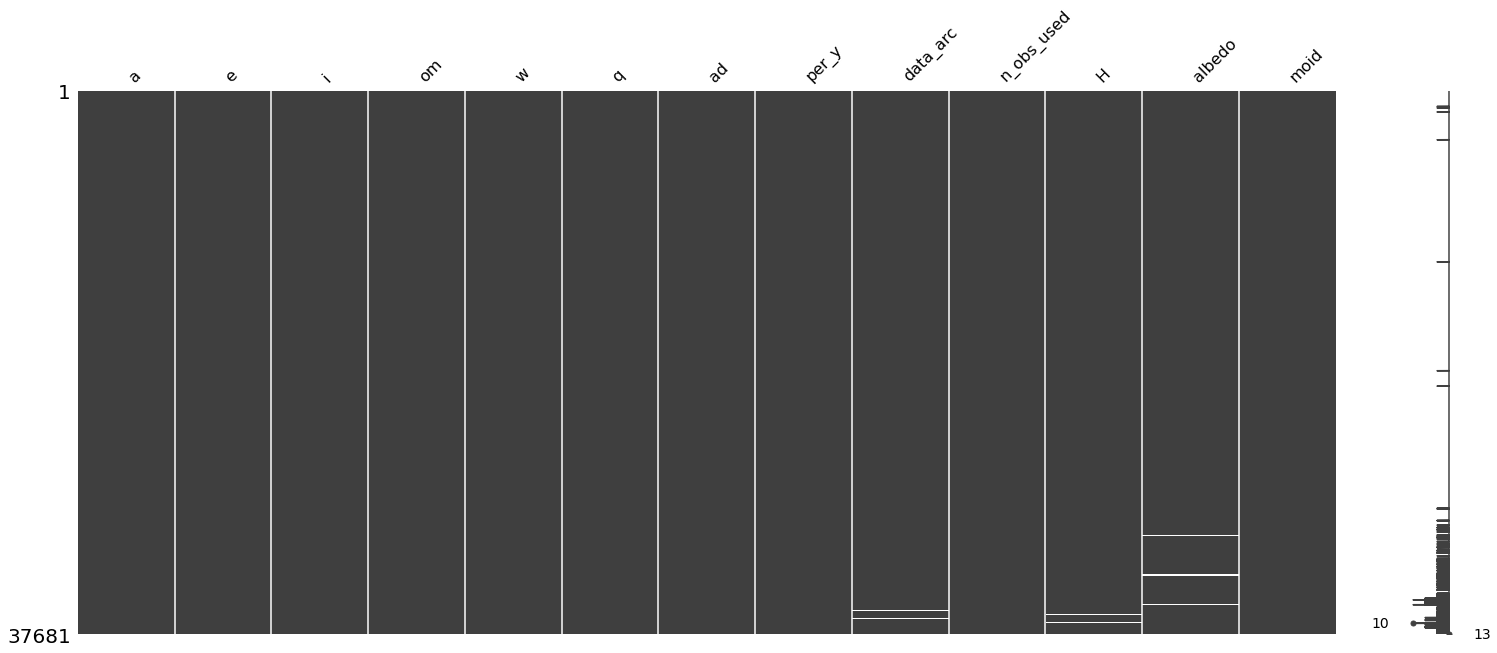

In [221]:
print(msno.matrix(datos_eva))

Considerando que el dataset contiene una gran cantidad de datos y podemos observar que aún existen datos nulos dentro de las variables que hemos seleccionado, decidimos eliminar directamente lo valores nulos que aun se mantienen al igual que la data de entrenamiento.

In [222]:
datos_eva = datos_eva.dropna()
datos_eva.info()
print('\n')
print('Podemos observar que el dataset a quedado sin datos nulos')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37229 entries, 0 to 37679
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   a           37229 non-null  float64
 1   e           37229 non-null  float64
 2   i           37229 non-null  float64
 3   om          37229 non-null  float64
 4   w           37229 non-null  float64
 5   q           37229 non-null  float64
 6   ad          37229 non-null  float64
 7   per_y       37229 non-null  float64
 8   data_arc    37229 non-null  float64
 9   n_obs_used  37229 non-null  int64  
 10  H           37229 non-null  float64
 11  albedo      37229 non-null  float64
 12  moid        37229 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 4.0 MB


Podemos observar que el dataset a quedado sin datos nulos


Al terminar de procesar la data de evaluación, procederemos aplicar el modelo seleccionado KNN para su predicción.

In [223]:
prediccion_knn = KNN.predict(datos_eva)
print(prediccion_knn)
print("Logramos predecir el campo Danger en formato Array")

['1' '1' '1' ... '1' '1' '1']
Logramos predecir el campo Danger en formato Array


Al obtener la predicción, se procede a tranformar la data obtenida en formato Dataframe para poder manejarla.

Se procede a renombrar la columna obtenida a columna Danger

In [224]:
prediccion_knn = pd.DataFrame(prediccion_knn)
prediccion_knn.columns = ['Danger']

Una vez ya cambiada la columna, procedemos a cambiar la variable 0 y 1 a False y True para que pueda ser incluida dentro del modelo predecido.

In [225]:
prediccion_knn["Danger"].replace({"0": False, "1": True}, inplace=True)

print("Danger, obtieniendo la cantidad de True y False")
print(prediccion_knn.Danger.value_counts(normalize=True))

Danger, obtieniendo la cantidad de True y False
True     0.997959
False    0.002041
Name: Danger, dtype: float64


Creamos un nuevo modelo datos_eva2 para poder incluirle el nuevo campo Danger, donde procederemos primero a incluirle un campos id autoincrementado a los dos datos ya obtenidos ( data para predecir, campo danger ya predecido segun los datos para predecir), para posterior hacer un JOIN entre ambas tablas con su campos ID para poder incluir el nuevo campo Danger.

In [226]:
datos_eva2 = datos_eva;
prediccion_knn['id'] = np.arange(prediccion_knn.shape[0]);
datos_eva2['id'] = np.arange(datos_eva2.shape[0]);

modelo_knn_predi = datos_eva2.set_index('id').join(prediccion_knn.set_index('id'))

Una vez ya generado el JOIN de ambas tablas, se procede a generar un archivo CSV con el "**nombre prediccion_knn.csv**" donde podemos apreciar la predicción Danger.

In [227]:
datos_eva_completo = modelo_knn_predi
datos_eva_completo.to_csv('prediccion_knn.csv', encoding='utf-8')
print(datos_eva_completo)

              a         e          i  ...  albedo      moid  Danger
id                                    ...                          
0      2.585567  0.166582   9.121644  ...   0.159  1.179660    True
1      2.470354  0.133032   5.591205  ...   0.193  1.129810    True
2      2.296654  0.217674  10.128731  ...   0.181  0.813258    True
3      2.914849  0.097677  13.715312  ...   0.166  1.643210    True
4      2.400161  0.254614  21.604840  ...   0.350  0.923495    True
...         ...       ...        ...  ...     ...       ...     ...
37224  3.159771  0.178476  10.209864  ...   0.101  1.608000    True
37225  3.195944  0.232949  26.521186  ...   0.111  1.590970    True
37226  3.194157  0.587350   6.487226  ...   0.043  0.324697    True
37227  3.155975  0.430349  28.718353  ...   0.116  0.854315    True
37228  3.171225  0.159119  27.098625  ...   0.021  1.663010    True

[37229 rows x 14 columns]
